# Proyek Analisis Data : Bike


*   Nama : Karren Gabriella Khoirunnisa
*   Email : m312b4kx2144@bangkit.academy
*   ID Dicoding : karrengabriella



## Pertanyaan Bisnis



*   Pertanyaan 1 : Bagaimana pola penggunaan sepeda berdasarkan musim?
*   Pertanyaan 2 : Bagaimana waktu (jam) memengaruhi jumlah penyewaaan sepeda?
*   Pertanyaan 3 :Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?



### Import Packages/Library yang digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Insight : pada bagian ini, perlu mengimpor semua library yang akan digunakan untuk analisis.

## Data Wrangling

### Gathering Data

In [17]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/karrengabriella/analisis-data_bike/main/data/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/karrengabriella/analisis-data_bike/main/data/day.csv')

Insight  :Data diambil dari sumber eksternal (GitHub) menggunakan fungsi pd.read_csv(). Dataset ini berisi data penyewaan sepeda per jam dan harian.

## Assesing Data

In [18]:
# Step 3: Melihat beberapa baris pertama dari kedua dataset
print("Data Hour:")
print(hour_df.head())
print("\nData Day:")
print(day_df.head())

# Step 4: Informasi dataset
print("\nInformasi Data Hour:")
print(hour_df.info())
print("\nInformasi Data Day:")
print(day_df.info())

Data Hour:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Data Day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0  

Insight : Statistik deskriptif menunjukkan gambaran umum tentang distribusi data, seperti nilai rata-rata, standar deviasi, dan informasi terkait distribusi lain.
Ini membantu mengidentifikasi potensi anomali atau outlier.

### Cleaning Data

In [20]:
# Function for data cleaning
def clear_data(df):
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    # Handle missing values (drop rows with missing values)
    df_cleaned = df.dropna()
    return df_cleaned

# Step 3: Membersihkan data menggunakan fungsi clear_data
hour_df_cleaned = clear_data(hour_df)
day_df_cleaned = clear_data(day_df)

Insight : Data cleaning mencakup penghapusan duplikasi dan missing values. Ini memastikan bahwa analisis dilakukan pada data yang bersih dan relevan.

### Exploratory Data Analysis (EDA)

## Explore Data

In [9]:
# Ekstraksi fitur tambahan dari dataset hour_df dan day_df
hour_df['season'] = hour_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
hour_df['datetime'] = pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='h')

# Melakukan grouping data
season_counts_hour = hour_df_cleaned.groupby('season')['cnt'].sum().reset_index()

In [19]:
# Ekstraksi Fitur Tambahan
hour_df['datetime'] = pd.to_datetime(hour_df['dteday']) + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df['year'] = hour_df['datetime'].dt.year
hour_df['month'] = hour_df['datetime'].dt.month
hour_df['day'] = hour_df['datetime'].dt.day
hour_df['hour'] = hour_df['datetime'].dt.hour
hour_df['season'] = hour_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

day_df['datetime'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['datetime'].dt.year
day_df['month'] = day_df['datetime'].dt.month
day_df['season'] = day_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


Insight : melakukan transformasi fitur dengan menambahkan kolom baru seperti season dan datetime. Dilakukan grouping data untuk analisis lebih lanjut. Fitur tambahan seperti season memungkinkan untuk mengamati pola berdasarkan musim.

### Visualization & Explanatory Analysis

Pertanyaan 1 : Apa pola penggunaan sepeda berdasarkan musim?

<ipython-input-21-6166acea1442>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_counts_hour, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

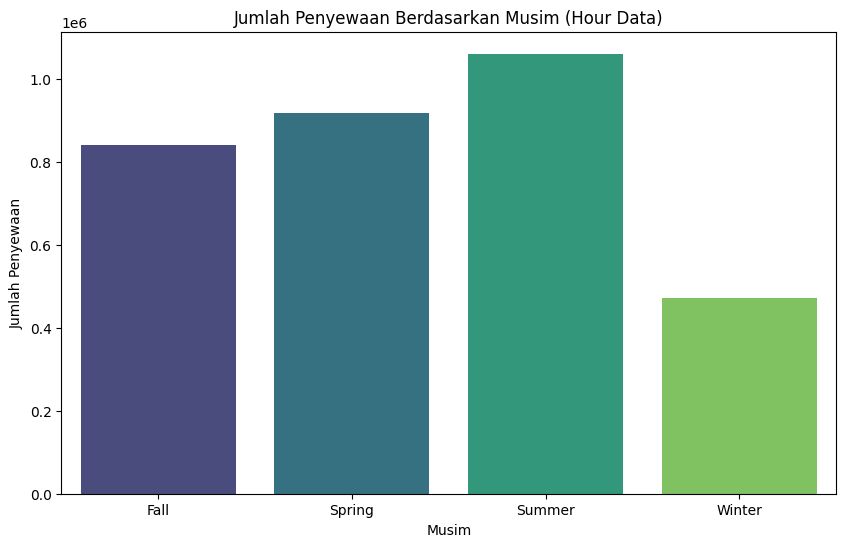

In [21]:
plt.figure(figsize=(10, 6))
season_counts_hour = hour_df.groupby('season')['cnt'].sum().reset_index()

sns.barplot(x='season', y='cnt', data=season_counts_hour, palette='viridis')
plt.title('Jumlah Penyewaan Berdasarkan Musim (Hour Data)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Insight : Musim seperti Spring dan Summer cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan Winter.


Pertanyaan 2 : Bagaimana pola penyewaan berdasarkan jam?

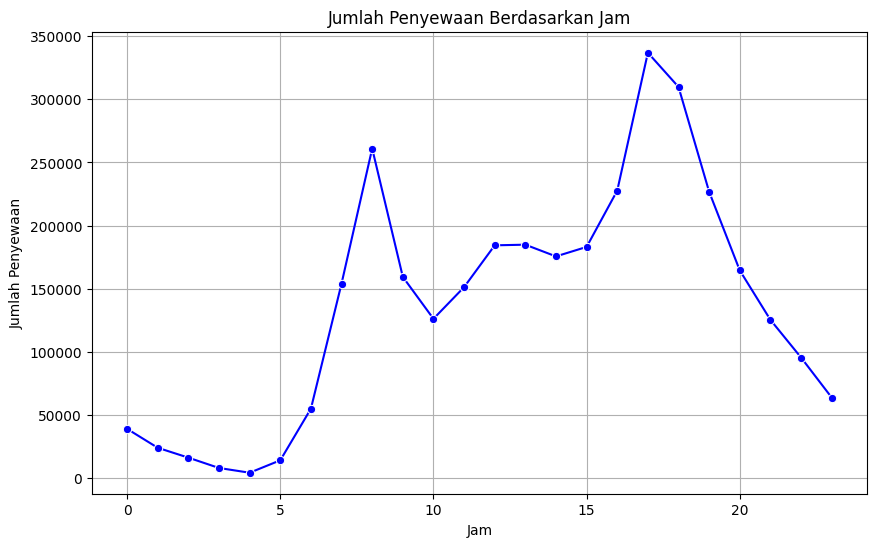

In [26]:
plt.figure(figsize=(10, 6))
hour_counts = hour_df.groupby('hour')['cnt'].sum().reset_index()

sns.lineplot(x='hour', y='cnt', data=hour_counts, marker='o', color='b')
plt.title('Jumlah Penyewaan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

Pertanyaan 3 : Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?

<ipython-input-27-bf4751a240b4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_counts_day, palette='plasma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

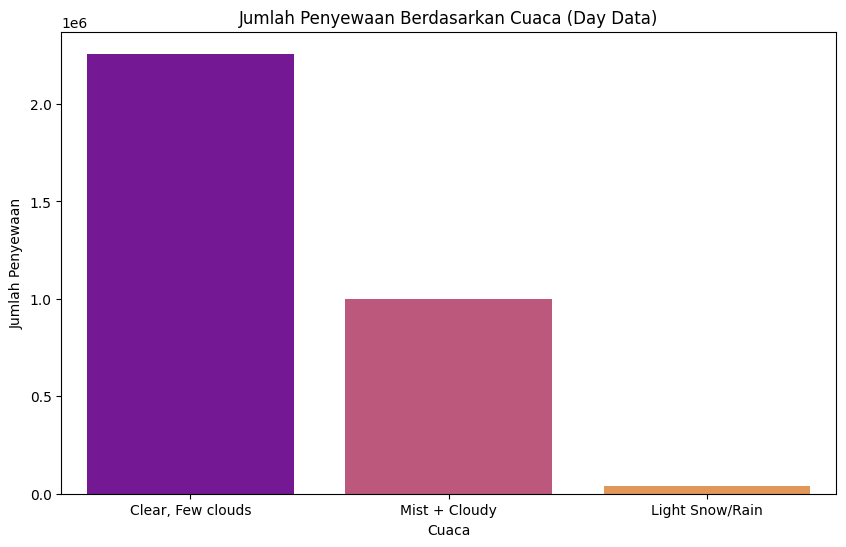

In [27]:
plt.figure(figsize=(10, 6))
weather_counts_day = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Menyusun kategori cuaca
weather_map_day = {1: 'Clear, Few clouds', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weather_counts_day['weathersit'] = weather_counts_day['weathersit'].map(weather_map_day)

sns.barplot(x='weathersit', y='cnt', data=weather_counts_day, palette='plasma')
plt.title('Jumlah Penyewaan Berdasarkan Cuaca (Day Data)')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()


In [29]:
#statistik Deskriptif

print("\nStatistik Deskriptif Data Hour:")
print(hour_df.describe())

print("\nStatistik Deskriptif Data Day:")
print(day_df.describe())


Statistik Deskriptif Data Hour:
          instant            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
min        0.000000      0.000000   

Insight : Cuaca juga memainkan peran penting. Penyewaan sepeda meningkat ketika cuaca cerah atau berawan, dan turun drastis saat hujan atau salju lebat.

### Conclusion(Kesimpulan) :

conclusion pertanyaan 1:

Musim mempengaruhi pola penggunaan sepeda, dengan puncaknya terjadi selama musim semi dan musim panas, terutama pada jam-jam siang dan sore.

Conclusion pertanyaan 2:

Jam mempengaruhi pola penggunaan sepeda diantara penggunaan sepeda akan ramai saat pagi dan sore dimana merupakan jam berangkat dan pulang kerja.

Conclusion pertanyaan 3:

Cuaca juga berdampak besar pada penyewaan sepeda, dengan penyewaan tertinggi terjadi selama cuaca cerah atau mendung, dan lebih rendah saat hujan deras atau salju.
